# New York Single Weekly Predictions, trained on historical flu data and temperature

> Once again, just like before in the USA flu model, I am going to index COVID weekly cases by Wednesdays

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing

## getting historical flu data

In [3]:
flu_dir = "../../cdc-fludata/us_national/"

In [4]:
flu_dictionary = {}

for year in range(1997, 2019):
    filepath = "usflu_"
    year_string = str(year) + "-" + str(year + 1)
    filepath = flu_dir + filepath + year_string + ".csv"
    temp_df = pd.read_csv(filepath)
    flu_dictionary[year] = temp_df

### combining flu data into one chronological series of total cases

In [5]:
# getting total cases and putting them in a series by week
flu_series_dict = {} 

for year in flu_dictionary:
    temp_df = flu_dictionary[year]
    temp_df = temp_df.set_index("WEEK")
    abridged_df = temp_df.iloc[:, 2:]
    
    try:
        abridged_df = abridged_df.drop(columns="PERCENT POSITIVE")
    except:
        pass
    
    total_cases_series = abridged_df.sum(axis=1)
    flu_series_dict[year] = total_cases_series
    

In [6]:
all_cases_series = pd.Series(dtype="int64")

for year in flu_series_dict:
    temp_series = flu_series_dict[year]
    all_cases_series = all_cases_series.append(temp_series, ignore_index=True)

In [7]:
all_cases_series

0         0
1        11
2        17
3         7
4        10
       ... 
1143     87
1144    110
1145    143
1146    147
1147    152
Length: 1148, dtype: int64

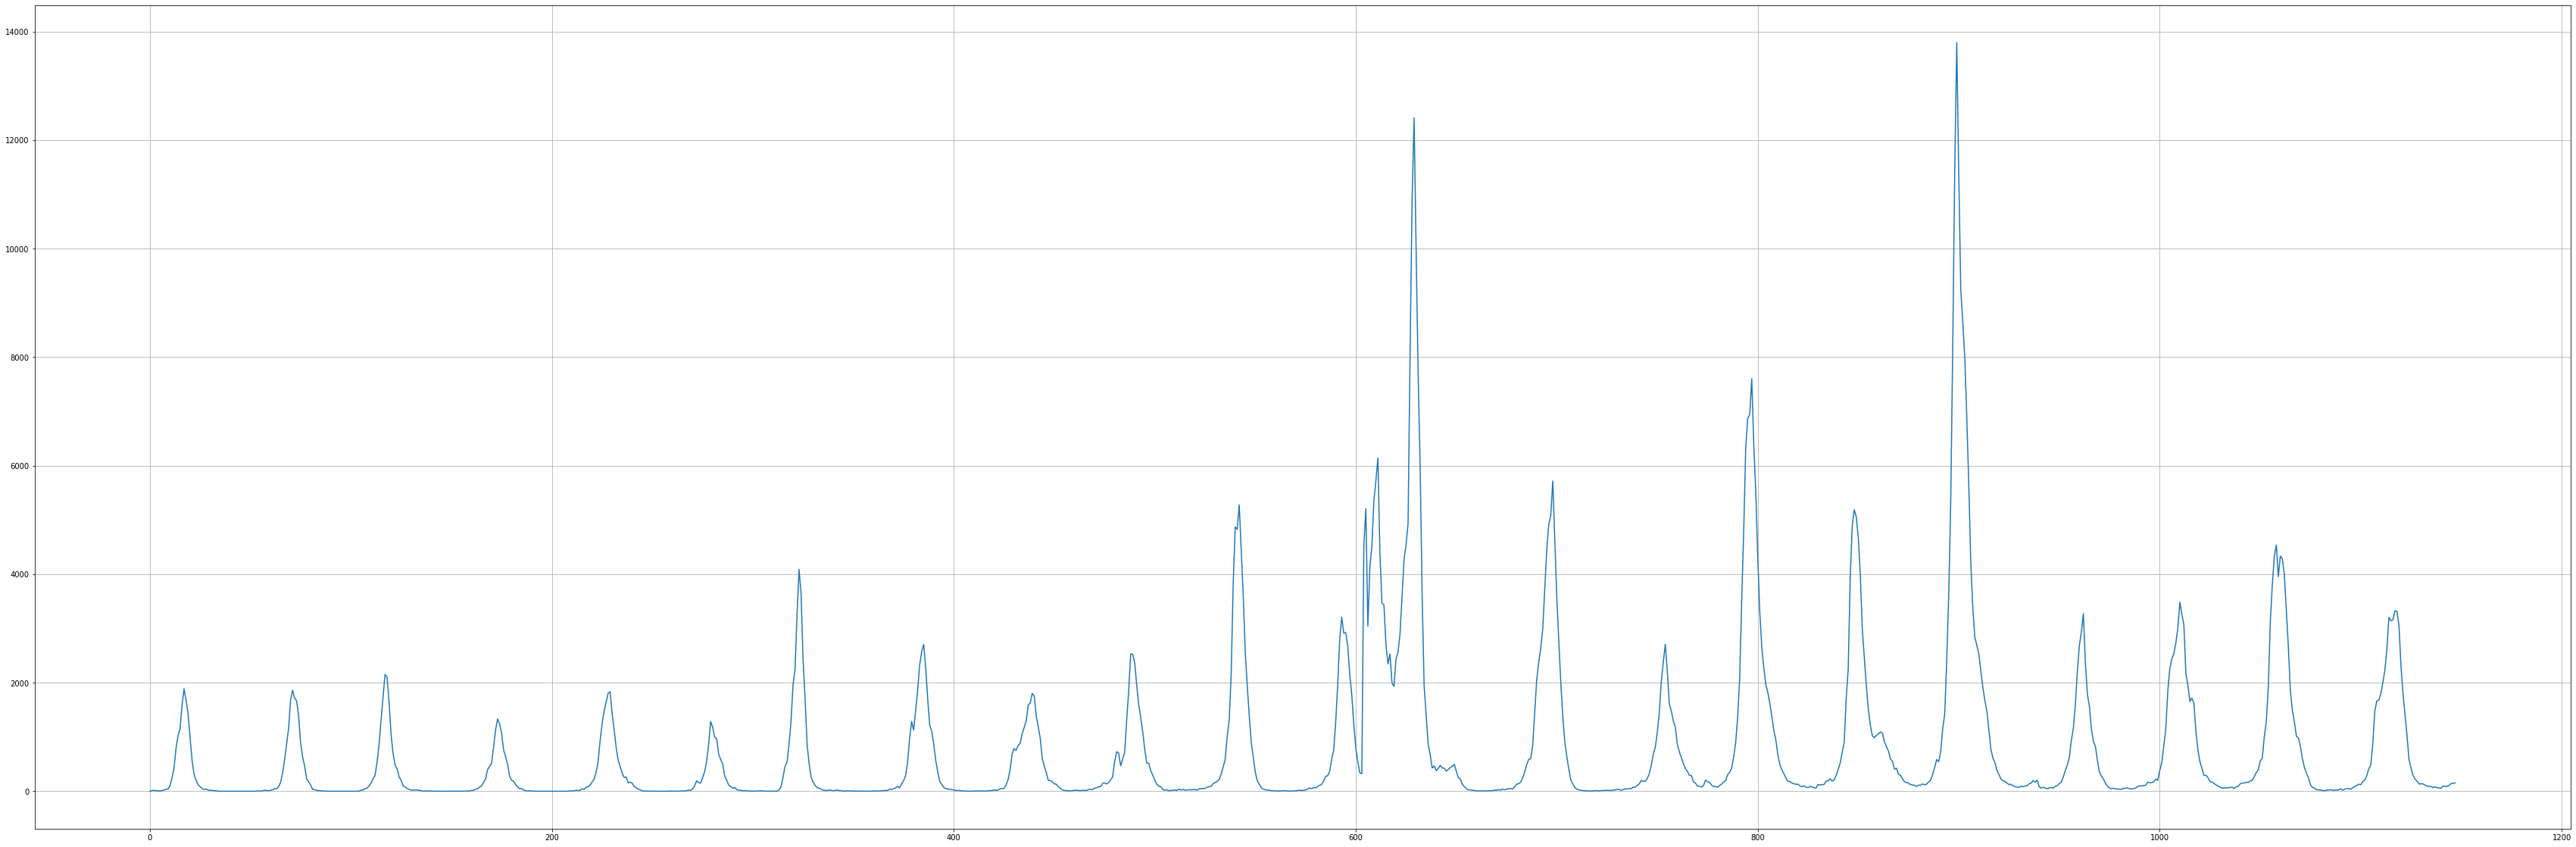

In [8]:
all_cases_series.plot(grid=True, figsize=(60,20))

### Now, making a normalized series between 0, 1

In [9]:
norm_flu_series_dict = {}

for year in flu_series_dict:
    temp_series = flu_series_dict[year]
    temp_list = preprocessing.minmax_scale(temp_series)
    temp_series = pd.Series(temp_list)
    norm_flu_series_dict[year] = temp_series

In [10]:
all_cases_norm_series = pd.Series(dtype="int64")

for year in norm_flu_series_dict:
    temp_series = norm_flu_series_dict[year]
    all_cases_norm_series = all_cases_norm_series.append(temp_series, ignore_index=True)

0       0.000000
1       0.005823
2       0.008999
3       0.003706
4       0.005294
          ...   
1143    0.009180
1144    0.016218
1145    0.026316
1146    0.027540
1147    0.029070
Length: 1148, dtype: float64

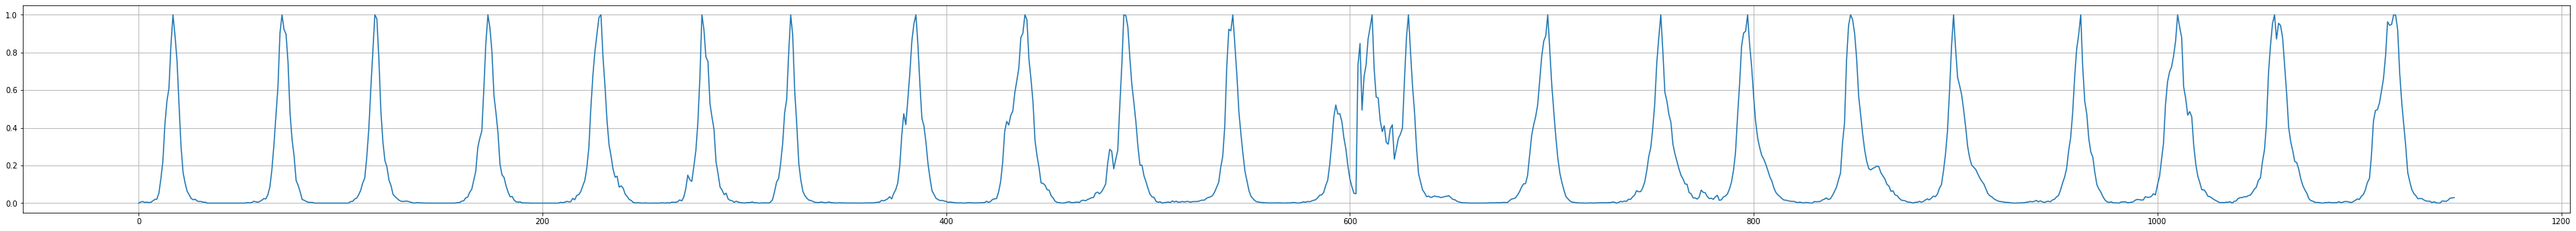

In [11]:
all_cases_norm_series.plot(grid=True, figsize=(60,5))
all_cases_norm_series

## Getting COVID-19 Case Data

In [17]:
datapath = "../../COVID-19/csse_covid_19_data/csse_covid_19_time_series/"

# Choose from "US Cases", "US Deaths", "World Cases", "World Deaths", "World Recoveries"
key = "US Cases" 

if key == "US Cases":
    datapath = datapath + "time_series_covid19_confirmed_US.csv"
elif key == "US Deaths":
    datapath = datapath + "time_series_covid19_deaths_US.csv"
elif key == "World Cases":
    datapath = datapath + "time_series_covid19_confirmed_global.csv"
elif key == "World Deaths":
    datapath = datapath + "time_series_covid19_deaths_global.csv"
elif key == "World Recoveries":
    datapath = datapath + "time_series_covid19_recovered_global.csv"

In [18]:
covid_df = pd.read_csv(datapath)

In [19]:
covid_df

UID iso2 iso3  code3  FIPS          Admin2  \
0           16   AS  ASM     16  60.0             NaN   
1          316   GU  GUM    316  66.0             NaN   
2          580   MP  MNP    580  69.0             NaN   
3          630   PR  PRI    630  72.0             NaN   
4          850   VI  VIR    850  78.0             NaN   
...        ...  ...  ...    ...   ...             ...   
3256  84070016   US  USA    840   NaN    Central Utah   
3257  84070017   US  USA    840   NaN  Southeast Utah   
3258  84070018   US  USA    840   NaN  Southwest Utah   
3259  84070019   US  USA    840   NaN       TriCounty   
3260  84070020   US  USA    840   NaN    Weber-Morgan   

                Province_State Country_Region        Lat       Long_  ...  \
0               American Samoa             US -14.271000 -170.132000  ...   
1                         Guam             US  13.444300  144.793700  ...   
2     Northern Mariana Islands             US  15.097900  145.673900  ...   
3                  Puerto Rico             US  18.220800  -66.590100  ...   
4               Virgin Islands             US  18.335800  -64.896300  ...   
...                        ...            ...        ...         ...  ...   
3256                      Utah             US  39.372319 -111.575868  ...   
3257                      Utah             US  38.996171 -110.701396  ...   
3258                      Utah             US  37.854472 -111.441876  ...   
3259                      Utah             US  40.124915 -109.517442  ...   
3260                      Utah             US  41.271160 -111.914512  ...   

     6/14/20  6/15/20  6/16/20  6/17/20  6/18/20  6/19/20  6/20/20  6/21/20  \
0          0        0        0        0        0        0        0        0   
1        183      185      186      188      192      200      222      222   
2         30       30       30       30       30       30       30       30   
3       5811     5890     5951     6003     6111     6195     6463     6525   
4         72       72       72       73       73       73       73       76   
...      ...      ...      ...      ...      ...      ...      ...      ...   
3256      75       77       79       81       81       89       96      102   
3257      29       29       29       29       30       31       31       31   
3258     806      827      855      889      919      974     1031     1056   
3259      30       30       31       33       33       38       38       38   
3260     502      511      539      555      588      616      641      666   

      6/22/20  6/23/20  
0           0        0  
1         222      225  
2          30       30  
3        6564     6685  
4          76       76  
...       ...      ...  
3256      110      114  
3257       31       31  
3258     1104     1151  
3259       39       39  
3260      676      708  

[3261 rows x 165 columns]

In [44]:
ny_data = covid_df.loc[covid_df["Province_State"] == "New York"]

In [45]:
ny_cases = ny_data.iloc[:,11:]
ny_cases

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
1833        0        0        0        0        0        0        0        0   
1834        0        0        0        0        0        0        0        0   
1835        0        0        0        0        0        0        0        0   
1836        0        0        0        0        0        0        0        0   
1837        0        0        0        0        0        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
1892        0        0        0        0        0        0        0        0   
1893        0        0        0        0        0        0        0        0   
1894        0        0        0        0        0        0        0        0   
3179        0        0        0        0        0        0        0        0   
3231        0        0        0        0        0        0        0        0   

      1/30/20  1/31/20  ...  6/14/20  6/15/20  6/16/20  6/17/20  6/18/20  \
1833        0        0  ...     2020     2022     2026     2029     2034   
1834        0        0  ...       54       55       55       55       57   
1835        0        0  ...        0        0        0        0        0   
1836        0        0  ...      651      655      656      657      657   
1837        0        0  ...      104      106      107      109      109   
...       ...      ...  ...      ...      ...      ...      ...      ...   
1892        0        0  ...    34290    34327    34358    34385    34409   
1893        0        0  ...       92       92       93       93       93   
1894        0        0  ...       40       40       40       40       40   
3179        0        0  ...        0        0        0        0        0   
3231        0        0  ...        0        0        0        0        0   

      6/19/20  6/20/20  6/21/20  6/22/20  6/23/20  
1833     2049     2053     2054     2060     2062  
1834       58       58       58       58       58  
1835        0        0        0        0        0  
1836      663      665      668      670      671  
1837      109      113      115      115      118  
...       ...      ...      ...      ...      ...  
1892    34455    34486    34521    34557    34581  
1893       93       93       93       93       93  
1894       40       41       41       42       43  
3179        0        0        0        0        0  
3231        0        0        0        0        0  

[64 rows x 154 columns]

In [46]:
ny_cases_total = ny_cases.sum(axis=0)

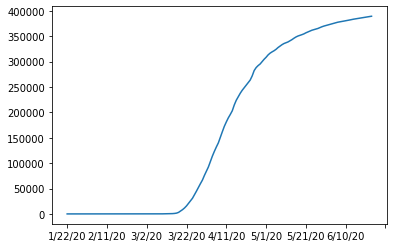

In [47]:
ny_cases_total.plot()

### convert daily data to weekly data

In [49]:
ny_weekly_cases = ny_cases_total.iloc[::7]

In [50]:
ny_weekly_cases

1/22/20         0
1/29/20         0
2/5/20          0
2/12/20         0
2/19/20         0
2/26/20         0
3/4/20         11
3/11/20       220
3/18/20      3038
3/25/20     30841
4/1/20      83948
4/8/20     151061
4/15/20    214454
4/22/20    258222
4/29/20    299691
5/6/20     323978
5/13/20    340661
5/20/20    354370
5/27/20    364965
6/3/20     374085
6/10/20    380156
6/17/20    385142
dtype: int64

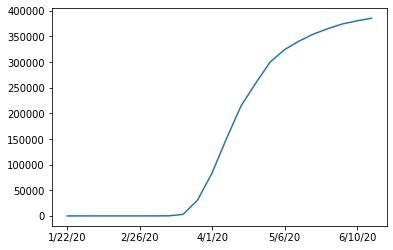

In [51]:
ny_weekly_cases.plot()

### Converting cumulative series to non-cumulative series

In [52]:
ny_wnew_cases = ny_weekly_cases.diff()
ny_wnew_cases[0] = 1.0
ny_wnew_cases

1/22/20        1.0
1/29/20        0.0
2/5/20         0.0
2/12/20        0.0
2/19/20        0.0
2/26/20        0.0
3/4/20        11.0
3/11/20      209.0
3/18/20     2818.0
3/25/20    27803.0
4/1/20     53107.0
4/8/20     67113.0
4/15/20    63393.0
4/22/20    43768.0
4/29/20    41469.0
5/6/20     24287.0
5/13/20    16683.0
5/20/20    13709.0
5/27/20    10595.0
6/3/20      9120.0
6/10/20     6071.0
6/17/20     4986.0
dtype: float64

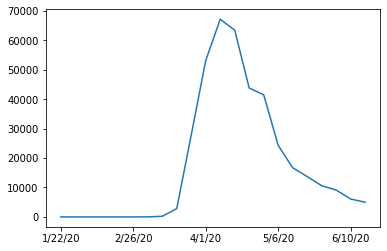

In [53]:
ny_wnew_cases.plot()

### normalizing weekly case data

0     0.000015
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000164
7     0.003114
8     0.041989
9     0.414271
10    0.791307
11    1.000000
12    0.944571
13    0.652154
14    0.617898
15    0.361882
16    0.248581
17    0.204267
18    0.157868
19    0.135890
20    0.090459
21    0.074293
dtype: float64

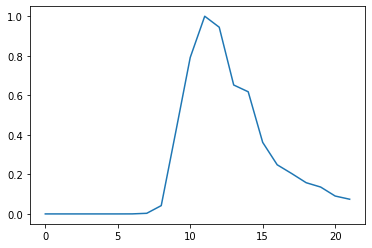

In [55]:
temp_list = sklearn.preprocessing.minmax_scale(ny_wnew_cases)
ny_wnew_cases_norm = pd.Series(temp_list)
ny_wnew_cases_norm.plot()
ny_wnew_cases_norm

## getting historical temperature data
> At the moment, this will be dummy data

In [58]:
flu_temp_data = np.full(len(all_cases_norm_series), 0.5)

In [59]:
training_data_df = pd.DataFrame({
    "Flu Cases" : all_cases_norm_series,
    "Temperature" : flu_temp_data
})
training_data_df

Flu Cases  Temperature
0      0.000000          0.5
1      0.005823          0.5
2      0.008999          0.5
3      0.003706          0.5
4      0.005294          0.5
...         ...          ...
1143   0.009180          0.5
1144   0.016218          0.5
1145   0.026316          0.5
1146   0.027540          0.5
1147   0.029070          0.5

[1148 rows x 2 columns]